# BernoulliNB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df=data.dropna()
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Level']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [5]:
del df['index']
del df['Patient Id']

In [6]:
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
x = df.drop(labels='Level', axis=1)
y = df.loc[:,'Level']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  800
Number of test dataset     :  200
Total number of dataset    :  1000


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

In [10]:
BNB = BernoulliNB()
BNB.fit(x_train,y_train)
predicted = BNB.predict(x_test)

In [11]:
cr = classification_report(y_test,predicted)
print('Classification report of BernoulliNB Result is:\n\n',cr)
print("\n")

Classification report of BernoulliNB Result is:

               precision    recall  f1-score   support

           0       0.36      1.00      0.53        73
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        66

    accuracy                           0.36       200
   macro avg       0.12      0.33      0.18       200
weighted avg       0.13      0.36      0.20       200





In [12]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of BernoulliNB is:\n\n',cm)
print("\n")

Confusion Matrix result of BernoulliNB is:

 [[73  0  0]
 [61  0  0]
 [66  0  0]]




In [13]:
accuracy = cross_val_score(BNB, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy*100)
print("\n")

Cross validation test results of accuracy: [36.5 36.5 36.5 36.5 36.5]




In [14]:
a = accuracy.mean() * 100
print("Accuracy Result of BernoulliNB is:",a)

Accuracy Result of BernoulliNB is: 36.5


Confusion matrix-BernoulliNB:
[[73  0  0]
 [61  0  0]
 [66  0  0]]


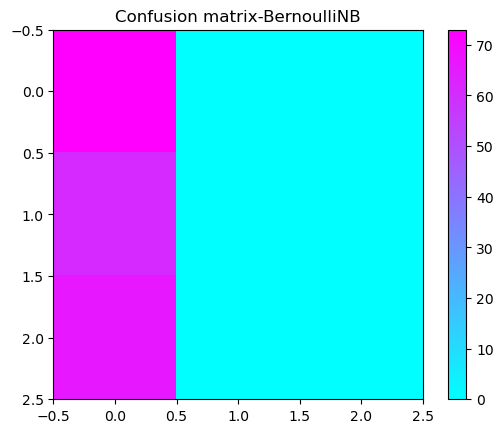

In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix-BernoulliNB', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-BernoulliNB:')
print(cm)
plot_confusion_matrix(cm)

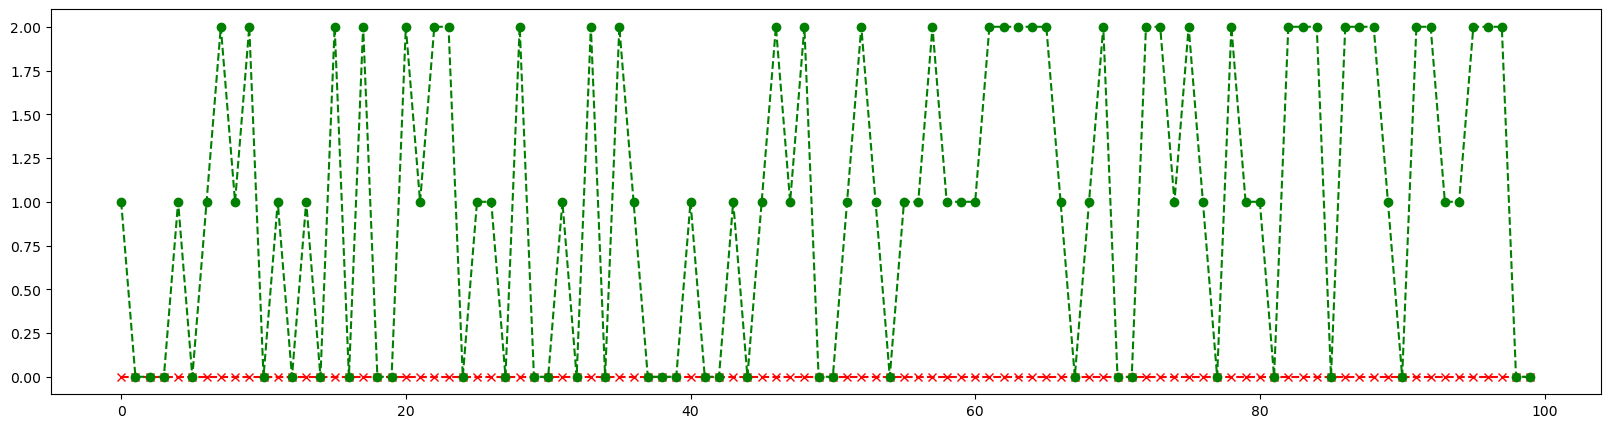

In [16]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()